# Sentiment Analysis with Stochastic Gradient Descent 

* python script for sentiment analysis with SGDC classifier

## Install and import required libraries and packages

In [3]:
from google.colab import drive
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle

## SGDC classifier on labeled dataset

* train dataset: 80% of manually labeled data
* test dataset: 20% of manually labeled data

### Read dataset

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# train data
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp project/Sentiment Analysis/final datasets/biden_tweets_labeled_train.csv')

train_df

,Unnamed: 0,raw_text,clean_text,subjectivity,polarity
0,1320,@Sundae_Gurl Biden's first move should be to p...,sundae gurl biden first move pardon hunter let...,0,2
1,782,@cobiscool @LilNasX Do you think joe Biden dri...,cobiscool lilnasx think joe biden drink caprisun,0,2
2,1128,"@ProudGayPatriot Don't worry, in the sense tha...",proudgaypatriot worry sense not getting electi...,1,1
3,199,@kclasgens @realDonaldTrump Not alone he didn'...,kclasgens realdonaldtrump not alone right even...,1,1
4,704,How Biden’s Climate Plans Will Shake Up Global...,biden climate plan shake global energy market,0,2
...,...,...,...,...,...
1407,1130,"@CNBC @CNBCPro If Biden comes to power, the go...",cnbc cnbcpro biden come power gold price return,1,1
1408,1294,"@KDFildesMBA We have a real President, Biden a...",kdfildesmba real president biden vice harris e...,1,1
1409,860,"What I care about at least as much, maybe more...",care least much maybe whether biden trump pres...,0,2
1410,1459,Joe Biden still doesn’t realize what the voter...,joe biden still realize voter democrat lost ac...,1,0


In [6]:
train_df.columns

Index(['Unnamed: 0', 'raw_text', 'clean_text', 'subjectivity', 'polarity'], dtype='object')

In [7]:
train_df = train_df.drop('Unnamed: 0', axis=1)

train_df

,raw_text,clean_text,subjectivity,polarity
0,@Sundae_Gurl Biden's first move should be to p...,sundae gurl biden first move pardon hunter let...,0,2
1,@cobiscool @LilNasX Do you think joe Biden dri...,cobiscool lilnasx think joe biden drink caprisun,0,2
2,"@ProudGayPatriot Don't worry, in the sense tha...",proudgaypatriot worry sense not getting electi...,1,1
3,@kclasgens @realDonaldTrump Not alone he didn'...,kclasgens realdonaldtrump not alone right even...,1,1
4,How Biden’s Climate Plans Will Shake Up Global...,biden climate plan shake global energy market,0,2
...,...,...,...,...
1407,"@CNBC @CNBCPro If Biden comes to power, the go...",cnbc cnbcpro biden come power gold price return,1,1
1408,"@KDFildesMBA We have a real President, Biden a...",kdfildesmba real president biden vice harris e...,1,1
1409,"What I care about at least as much, maybe more...",care least much maybe whether biden trump pres...,0,2
1410,Joe Biden still doesn’t realize what the voter...,joe biden still realize voter democrat lost ac...,1,0


In [8]:
# test data
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp project/Sentiment Analysis/final datasets/biden_tweets_labeled_test.csv')

test_df

,Unnamed: 0,raw_text,clean_text,subjectivity,polarity
0,0,Sidney Powell amends court filing that said Ge...,sidney powell amends court filing said georgia...,1,1
1,1,@LisaMirandoCNN @wolfblitzer What's your thoug...,lisamirandocnn wolfblitzer thought cnn jake ta...,0,2
2,2,Breaking #FoxNews Alert : Joe Biden just revea...,breaking foxnews alert joe biden revealed goin...,0,2
3,3,"@RWPUSA Richard, have you heard there could be...",rwpusa richard heard could several republican ...,1,0
4,4,@LeafCavalier @AFJustinKG1 Is that a real-life...,leafcavalier afjustinkg real life question not...,1,0
...,...,...,...,...,...
349,349,@realDonaldTrump Thank you Biden!!!,realdonaldtrump thank biden,1,1
350,350,Kellyanne Conway acknowledges Biden as apparen...,kellyanne conway acknowledges biden apparent w...,0,2
351,351,@JeffTutorials @realDonaldTrump Ah Jeff. I ag...,jefftutorials realdonaldtrump ah jeff agree bi...,1,0
352,352,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...,0,2


In [9]:
test_df.columns

Index(['Unnamed: 0', 'raw_text', 'clean_text', 'subjectivity', 'polarity'], dtype='object')

In [10]:
test_df = test_df.drop('Unnamed: 0', axis=1)

test_df

,raw_text,clean_text,subjectivity,polarity
0,Sidney Powell amends court filing that said Ge...,sidney powell amends court filing said georgia...,1,1
1,@LisaMirandoCNN @wolfblitzer What's your thoug...,lisamirandocnn wolfblitzer thought cnn jake ta...,0,2
2,Breaking #FoxNews Alert : Joe Biden just revea...,breaking foxnews alert joe biden revealed goin...,0,2
3,"@RWPUSA Richard, have you heard there could be...",rwpusa richard heard could several republican ...,1,0
4,@LeafCavalier @AFJustinKG1 Is that a real-life...,leafcavalier afjustinkg real life question not...,1,0
...,...,...,...,...
349,@realDonaldTrump Thank you Biden!!!,realdonaldtrump thank biden,1,1
350,Kellyanne Conway acknowledges Biden as apparen...,kellyanne conway acknowledges biden apparent w...,0,2
351,@JeffTutorials @realDonaldTrump Ah Jeff. I ag...,jefftutorials realdonaldtrump ah jeff agree bi...,1,0
352,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...,0,2


In [11]:
train_df.shape, test_df.shape

((1412, 4), (354, 4))

### Vectorize data

In [12]:
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 1,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

In [13]:
train_vectors = vectorizer.fit_transform(train_df['clean_text'])
test_vectors = vectorizer.transform(test_df['clean_text'])

### SGDC model

In [14]:
# define & compile model
SGDC = SGDClassifier()

# fit model
t0 = time.time()
SGDC.fit(train_vectors, train_df['polarity'])
t1 = time.time()

# predict with model
prediction_linear = SGDC.predict(test_vectors)
t2 = time.time()

# get train and test timings
time_linear_train = t1-t0
time_linear_predict = t2-t1

In [15]:
prediction_linear

array([1, 0, 2, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1,
       2, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2,
       2, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1,
       0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 2, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 0,
       1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 1,

### Export model and results

In [16]:
# add sgdc scores to dataframe
test_df['sgdc_score'] = prediction_linear.tolist()

test_df

,raw_text,clean_text,subjectivity,polarity,sgdc_score
0,Sidney Powell amends court filing that said Ge...,sidney powell amends court filing said georgia...,1,1,1
1,@LisaMirandoCNN @wolfblitzer What's your thoug...,lisamirandocnn wolfblitzer thought cnn jake ta...,0,2,0
2,Breaking #FoxNews Alert : Joe Biden just revea...,breaking foxnews alert joe biden revealed goin...,0,2,2
3,"@RWPUSA Richard, have you heard there could be...",rwpusa richard heard could several republican ...,1,0,0
4,@LeafCavalier @AFJustinKG1 Is that a real-life...,leafcavalier afjustinkg real life question not...,1,0,1
...,...,...,...,...,...
349,@realDonaldTrump Thank you Biden!!!,realdonaldtrump thank biden,1,1,1
350,Kellyanne Conway acknowledges Biden as apparen...,kellyanne conway acknowledges biden apparent w...,0,2,1
351,@JeffTutorials @realDonaldTrump Ah Jeff. I ag...,jefftutorials realdonaldtrump ah jeff agree bi...,1,0,0
352,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...,0,2,2


In [17]:
# labeled test data
sgdc_label_file_name = 'sgdc_results_test_labeled.csv'
  
test_df.to_csv(sgdc_label_file_name)

In [18]:
# pickling the vectorizer
pickle.dump(vectorizer, open('sgdc_vectorizer.sav', 'wb'))

In [19]:
# pickling the model
pickle.dump(SGDC, open('sgdc_classifier.sav', 'wb'))

### Evaluate model

In [20]:
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

Training time: 0.010704s; Prediction time: 0.000307s


In [21]:
acc_score = accuracy_score(test_df['polarity'], prediction_linear)

print("accuracy: ", str(acc_score))

accuracy:  0.7937853107344632


In [22]:
report = classification_report(test_df['polarity'], prediction_linear)

print(report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       167
           1       0.74      0.71      0.72        96
           2       0.77      0.77      0.77        91

    accuracy                           0.79       354
   macro avg       0.78      0.78      0.78       354
weighted avg       0.79      0.79      0.79       354



## Apply on full dataset

### Read dataset

In [23]:
# full data
df_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp project/Sentiment Analysis/final datasets/biden_tweets_processed.csv')

df_full

,Unnamed: 0,raw_text,clean_text
0,0,@NCatalyst19 @RattlerGator This fake virus is ...,ncatalyst rattlergator fake virus deep state g...
1,1,@propublica I now think Biden should keep Trum...,propublica think biden keep trump anti deep st...
2,2,@Acosta Hopefully it's a foregone conclusion t...,acosta hopefully foregone conclusion president...
3,3,@realDonaldTrump @POTUS I don't trust the @FBI...,realdonaldtrump potus trust fbi wray even look...
4,4,President-elect Joe Biden is predicting a “ble...,president elect joe biden predicting bleak fut...
...,...,...,...
17626,17626,"@MSNBC I mean shit, what if Biden turns out to...",msnbc mean shit biden turn disaster people flo...
17627,17627,Pentagon blocks visits to military spy agencie...,pentagon block visit military spy agency biden...
17628,17628,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...
17629,17629,@Tomboliko @the_resistor @realDonaldTrump Hill...,tomboliko resistor realdonaldtrump hillary che...


In [24]:
df_full.columns

Index(['Unnamed: 0', 'raw_text', 'clean_text'], dtype='object')

In [25]:
df_full = df_full.drop('Unnamed: 0', axis=1)

df_full

,raw_text,clean_text
0,@NCatalyst19 @RattlerGator This fake virus is ...,ncatalyst rattlergator fake virus deep state g...
1,@propublica I now think Biden should keep Trum...,propublica think biden keep trump anti deep st...
2,@Acosta Hopefully it's a foregone conclusion t...,acosta hopefully foregone conclusion president...
3,@realDonaldTrump @POTUS I don't trust the @FBI...,realdonaldtrump potus trust fbi wray even look...
4,President-elect Joe Biden is predicting a “ble...,president elect joe biden predicting bleak fut...
...,...,...
17626,"@MSNBC I mean shit, what if Biden turns out to...",msnbc mean shit biden turn disaster people flo...
17627,Pentagon blocks visits to military spy agencie...,pentagon block visit military spy agency biden...
17628,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...
17629,@Tomboliko @the_resistor @realDonaldTrump Hill...,tomboliko resistor realdonaldtrump hillary che...


### Vectorize data

In [26]:
full_vectors = vectorizer.transform(df_full['clean_text'])

### SGDC sentiment analysis

In [27]:
full_prediction_linear = SGDC.predict(full_vectors)

In [28]:
full_prediction_linear

array([2, 0, 1, ..., 2, 0, 2])

In [29]:
# add sgdc scores to dataframe
df_full['sgdc_score'] = full_prediction_linear.tolist()

df_full

,raw_text,clean_text,sgdc_score
0,@NCatalyst19 @RattlerGator This fake virus is ...,ncatalyst rattlergator fake virus deep state g...,2
1,@propublica I now think Biden should keep Trum...,propublica think biden keep trump anti deep st...,0
2,@Acosta Hopefully it's a foregone conclusion t...,acosta hopefully foregone conclusion president...,1
3,@realDonaldTrump @POTUS I don't trust the @FBI...,realdonaldtrump potus trust fbi wray even look...,0
4,President-elect Joe Biden is predicting a “ble...,president elect joe biden predicting bleak fut...,2
...,...,...,...
17626,"@MSNBC I mean shit, what if Biden turns out to...",msnbc mean shit biden turn disaster people flo...,0
17627,Pentagon blocks visits to military spy agencie...,pentagon block visit military spy agency biden...,2
17628,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...,2
17629,@Tomboliko @the_resistor @realDonaldTrump Hill...,tomboliko resistor realdonaldtrump hillary che...,0


### Results summary

In [30]:
total_counts = len(df_full.index)

total_counts

17631

In [31]:
df_full['sgdc_score'].unique()

array([2, 0, 1])

In [32]:
lsvc_counts = df_full['sgdc_score'].value_counts()

lsvc_counts

0    7888
1    5403
2    4340
Name: sgdc_score, dtype: int64

In [33]:
neg_counts = df_full['sgdc_score'].value_counts()[0]

neg_counts

7888

In [34]:
pos_counts = df_full['sgdc_score'].value_counts()[1]

pos_counts

5403

In [35]:
neu_counts = df_full['sgdc_score'].value_counts()[2]

neu_counts

4340

In [36]:
print("Total number of tweets: " + str(total_counts))
print('\n')
print("Number of negative tweets: " + str(neg_counts))
print("Number of positive tweets: " + str(pos_counts))
print("Number of neutral tweets: " + str(neu_counts))

Total number of tweets: 17631


Number of negative tweets: 7888
Number of positive tweets: 5403
Number of neutral tweets: 4340


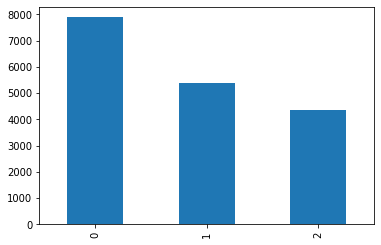

In [37]:
df_full['sgdc_score'].value_counts().plot.bar()

### Export results

In [38]:
# full data
sgdc_file_name = 'sgdc_results_full.csv'
  
df_full.to_csv(sgdc_file_name)